# Inference of Superstore Membership Predictor Project

# Introduction

Author Name: Ade William Tabrani

Program Objective: classify people based on their likelihood to buy a superstore membership

# Lib Loading

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score
import pickle

## Data Loading

In [30]:
# load x inference
X_inference = pd.read_csv('https://raw.githubusercontent.com/AdeWT/Superstore-Membership-Predictor-Project-AdeWT/main/SMPP%20Inference/X_inference_SMPP.csv')

In [31]:
# see data
X_inference.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
0,Master,Together,62847.0,0,0,45,521,168,706,80,76,61,1,3,6,4,0
1,Graduation,Married,73691.0,0,1,58,707,21,250,85,43,73,2,6,2,8,0
2,Master,Divorced,60161.0,0,1,17,584,44,212,46,8,177,3,11,4,8,0
3,Master,Together,36301.0,1,0,53,11,12,35,3,5,12,1,3,0,3,0
4,PhD,Married,62670.0,0,1,57,539,30,92,80,46,38,1,5,3,13,0


In [32]:
# load y inference
y_inference = pd.read_csv('https://raw.githubusercontent.com/AdeWT/Superstore-Membership-Predictor-Project-AdeWT/main/SMPP%20Inference/y_inference_SMPP.csv')

In [33]:
# see data
y_inference.head()

,Response
0,0
1,0
2,0
3,0
4,0


# Preprocessing

In [34]:
#load pickles from main notebook

with open('encoder1.pkl', 'rb') as file:
    # Call load method to deserialze
    encoder = pickle.load(file)

with open('scaler1.pkl', 'rb') as file:
    # Call load method to deserialze
    scaler = pickle.load(file)

with open('model1.pkl', 'rb') as file:
    # Call load method to deserialze
    model = pickle.load(file)

In [35]:
# get categ data and num

X_inference_categ = X_inference[['Education','Marital_Status']]
X_inference_num = X_inference.drop(['Education','Marital_Status'], axis='columns')

In [36]:
# see categ data

X_inference_categ.head()

,Education,Marital_Status
0,Master,Together
1,Graduation,Married
2,Master,Divorced
3,Master,Together
4,PhD,Married


## Encode

In [37]:
# encode

X_inference_encoded = encoder.transform(X_inference_categ)

In [38]:
#see encoded data

X_inference_encoded.head()

,Education,Marital_Status
0,2.0,2.0
1,1.0,4.0
2,2.0,1.0
3,2.0,2.0
4,3.0,4.0


In [39]:
# get the data to be scaled

X_inference_to_scale = pd.concat([X_inference_encoded, X_inference_num], axis='columns')
X_inference_to_scale.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
0,2.0,2.0,62847.0,0,0,45,521,168,706,80,76,61,1,3,6,4,0
1,1.0,4.0,73691.0,0,1,58,707,21,250,85,43,73,2,6,2,8,0
2,2.0,1.0,60161.0,0,1,17,584,44,212,46,8,177,3,11,4,8,0
3,2.0,2.0,36301.0,1,0,53,11,12,35,3,5,12,1,3,0,3,0
4,3.0,4.0,62670.0,0,1,57,539,30,92,80,46,38,1,5,3,13,0


## Scale

In [40]:
#scaling

X_inference_final = scaler.transform(X_inference_to_scale)
X_inference_final.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
0,0.666667,0.50,0.091914,0.0,0.0,0.454545,0.348962,0.844221,0.409275,0.308880,0.290076,0.190031,0.066667,0.111111,0.214286,0.307692,0.0
1,0.333333,1.00,0.108222,0.0,0.5,0.585859,0.473543,0.105528,0.144928,0.328185,0.164122,0.227414,0.133333,0.222222,0.071429,0.615385,0.0
2,0.666667,0.25,0.087875,0.0,0.5,0.171717,0.391159,0.221106,0.122899,0.177606,0.030534,0.551402,0.200000,0.407407,0.142857,0.615385,0.0
3,0.666667,0.50,0.051991,0.5,0.0,0.535354,0.007368,0.060302,0.020290,0.011583,0.019084,0.037383,0.066667,0.111111,0.000000,0.230769,0.0
4,1.000000,1.00,0.091648,0.0,0.5,0.575758,0.361018,0.150754,0.053333,0.308880,0.175573,0.118380,0.066667,0.185185,0.107143,1.000000,0.0


# Model Inference

In [41]:
# Model Evaluation
classes=['Not Buy [Negative]','Buy [Positive]']
def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

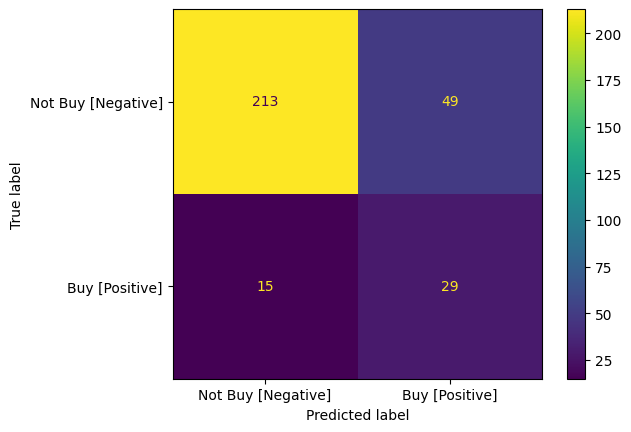

                    precision    recall  f1-score   support

Not Buy [Negative]       0.93      0.81      0.87       262
    Buy [Positive]       0.37      0.66      0.48        44

          accuracy                           0.79       306
         macro avg       0.65      0.74      0.67       306
      weighted avg       0.85      0.79      0.81       306



In [42]:
performance_check(model, X_inference_final, y_inference, classes)

Insight = With inference / new data, model was able to correctly classify 66%  of all buyers (recall = 66%)